In [19]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv


# **REGRESION LINEAL MULTIPLE**

In [117]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
data = pd.read_csv("train.csv")
print(data.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [119]:
# Preparar los datos
# Seleccionar solo variables numéricas
numeric_data = data.select_dtypes(include=[np.number])

In [120]:
# Eliminar filas con valores faltantes
numeric_data = numeric_data.dropna()

In [121]:
# Separar variables independientes y dependiente
X = numeric_data.drop(['Id', 'SalePrice'], axis=1)
y = numeric_data['SalePrice']

In [122]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=50)

In [123]:
# Construir y entrenar el modelo de regresión lineal
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [124]:
# Hacer predicciones
y_pred_lr = lr.predict(X_test)

In [125]:
# Evaluar el modelo
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [126]:
print("Regresión Lineal:")
print(f"MSE: {mse_lr:.2f}")
print(f"R²: {r2_lr:.2f}")

Regresión Lineal:
MSE: 2244869108.46
R²: 0.77


In [129]:
# Realizar 5 predicciones nuevas
nuevas_casas = X_test[:5]
predicciones_lr = lr.predict(nuevas_casas)

In [130]:
print("\nPredicciones de Regresión Lineal para 5 casas:")
for i, pred in enumerate(predicciones_lr, 1):
    print(f"Casa {i}: ${pred:,.2f}")


Predicciones de Regresión Lineal para 5 casas:
Casa 1: $159,150.37
Casa 2: $94,603.93
Casa 3: $125,841.45
Casa 4: $311,262.93
Casa 5: $324,628.61


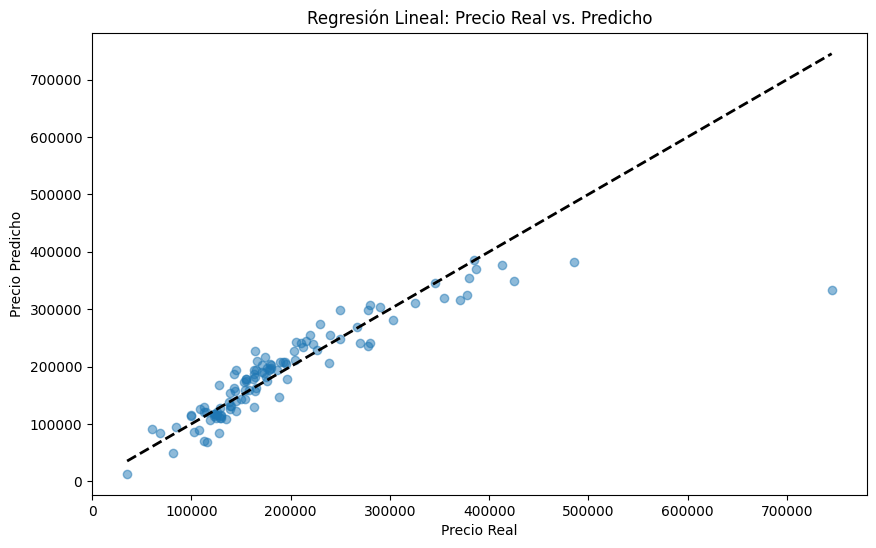

In [131]:
# Visualización de resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.title('Regresión Lineal: Precio Real vs. Predicho')
plt.show()

# **RED NEURONAL ARTIFICIAL**

In [132]:
# Importar bibliotecas adicionales para la RNA
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

In [133]:
# Escalar los datos (importante para redes neuronales)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [134]:
# Construir y entrenar el modelo de red neuronal
mlp = MLPRegressor(hidden_layer_sizes=(1500,), max_iter=1500, random_state=45)
mlp.fit(X_train_scaled, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(1500,), max_iter=1500, random_state=45)

In [135]:
# Hacer predicciones
y_pred_mlp = mlp.predict(X_test_scaled)

In [136]:
# Evaluar el modelo
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

In [137]:
print("\nRed Neuronal:")
print(f"MSE: {mse_mlp:.2f}")
print(f"R²: {r2_mlp:.2f}")


Red Neuronal:
MSE: 3119798082.26
R²: 0.68


In [138]:
# Realizar 5 predicciones nuevas (usando datos escalados)
nuevas_casas_scaled = scaler.transform(nuevas_casas)
predicciones_mlp = mlp.predict(nuevas_casas_scaled)

In [139]:
print("\nPredicciones de Red Neuronal para 5 casas:")
for i, pred in enumerate(predicciones_mlp, 1):
    print(f"Casa {i}: ${pred:,.2f}")


Predicciones de Red Neuronal para 5 casas:
Casa 1: $96,017.26
Casa 2: $161,407.13
Casa 3: $127,807.79
Casa 4: $292,240.86
Casa 5: $343,631.42


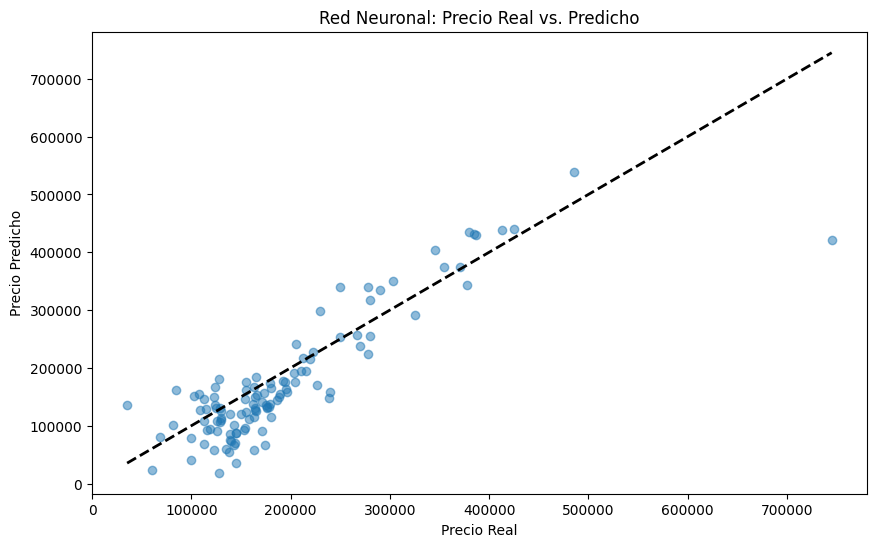

In [140]:
# Visualización de resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_mlp, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.title('Red Neuronal: Precio Real vs. Predicho')
plt.show()

# **COMPARACION DE MODELOS**

In [141]:
# Comparación de los modelos
comparacion = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Red Neuronal'],
    'MSE': [mse_lr, mse_mlp],
    'R²': [r2_lr, r2_mlp]
})

In [142]:
print("\nComparación de Modelos:")
print(comparacion)


Comparación de Modelos:
             Modelo           MSE        R²
0  Regresión Lineal  2.244869e+09  0.767097
1      Red Neuronal  3.119798e+09  0.676324


In [143]:
# Configurar el gráfico
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0, 0.5, 'Error Cuadrático Medio')

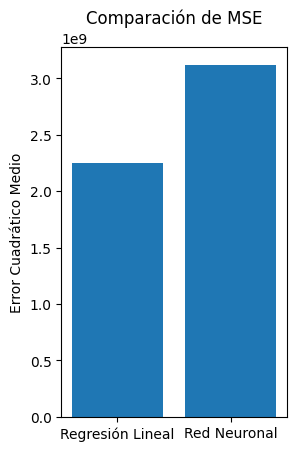

In [144]:
plt.subplot(1, 2, 1)
plt.bar(comparacion['Modelo'], comparacion['MSE'])
plt.title('Comparación de MSE')
plt.ylabel('Error Cuadrático Medio')

Text(0, 0.5, 'Coeficiente de Determinación')

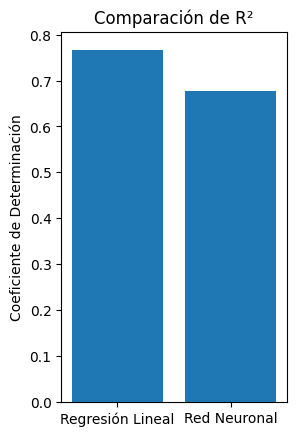

In [145]:
plt.subplot(1, 2, 2)
plt.bar(comparacion['Modelo'], comparacion['R²'])
plt.title('Comparación de R²')
plt.ylabel('Coeficiente de Determinación')

In [146]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>